In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


In [17]:
data=pd.read_csv('Merged_Data.csv',parse_dates=['Tarih'], index_col='Tarih',sep=',',decimal='.',date_format='%Y-%m-%d')
data=data.drop(columns=["Hacim","Fark%","GDP"],axis=1)
#data.dropna(inplace=True)
data.tail(10)

,AdjClose,Açılış,Yüksek,Düşük,M1,Inflation,InterestRate,USD_TRY,BIST100
Tarih,,,,,,,,,
2024-01-03,230.10,235.90,236.00,229.7,5.515378e+09,68.50,44.86,29.69,7412.04
2024-01-04,233.30,230.70,234.30,229.7,5.452040e+09,69.80,44.93,29.75,7547.84
2024-01-05,239.20,233.80,239.20,233.2,5.393797e+09,75.45,45.00,29.82,7628.73
2024-01-06,240.33,235.57,240.83,234.7,5.532444e+09,71.60,45.07,29.84,7692.12
2024-01-07,241.47,237.33,242.47,236.2,5.537031e+09,61.78,45.14,29.86,7755.50
2024-01-08,242.60,239.10,244.10,237.7,5.982992e+09,51.97,45.21,29.88,7818.89
2024-01-09,242.90,243.90,250.50,239.4,6.105518e+09,49.38,45.29,29.87,7736.26
2024-01-10,249.90,242.90,252.25,242.2,6.087428e+09,48.58,45.36,29.95,7874.16
2024-01-11,246.70,250.50,251.50,245.0,6.089273e+09,47.09,45.43,29.96,7895.96


In [18]:
data['LogAdjClose'] = np.log(data['AdjClose'])
#data['DiffLogAdjClose'] = data['LogAdjClose'].diff()
data.dropna(inplace=True)

In [19]:
series = data['LogAdjClose']
train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]

In [20]:
from pmdarima.arima import auto_arima

model = auto_arima(train,
                   seasonal=True,
                   stepwise=True,
                   suppress_warnings=True,
                   trace=True)

c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\o

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-13524.342, Time=1.87 sec


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-13510.481, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-13515.438, Time=0.10 sec


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-13514.732, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-13511.254, Time=0.12 sec


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-13518.743, Time=0.62 sec


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-13520.354, Time=0.34 sec


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-13523.524, Time=2.02 sec


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-13517.754, Time=1.07 sec


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-13518.184, Time=0.25 sec


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-13517.493, Time=2.06 sec


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-13517.825, Time=0.68 sec


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-13514.666, Time=0.50 sec


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-13525.783, Time=1.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-13519.696, Time=0.14 sec


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-13521.309, Time=0.24 sec


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0]             : AIC=-13525.107, Time=1.48 sec


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0]             : AIC=-13520.317, Time=1.24 sec


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-13524.500, Time=0.51 sec


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0]             : AIC=-13518.492, Time=0.82 sec


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0]             : AIC=-13518.800, Time=0.29 sec


c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0]             : AIC=-13517.273, Time=1.36 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0]          
Total fit time: 17.564 seconds


In [21]:
print("Seçilen model:", model.summary())

Seçilen model:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2638
Model:               SARIMAX(2, 1, 2)   Log Likelihood                6767.891
Date:                Fri, 04 Apr 2025   AIC                         -13525.783
Time:                        06:41:16   BIC                         -13496.396
Sample:                    01-02-2015   HQIC                        -13515.143
                         - 03-23-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1244      0.110     -1.131      0.258      -0.340       0.091
ar.L2          0.6700      0.114      5.892      0.000       0.447       0.893
ma.L1          0.1616      0.116     

In [22]:
# %% Test verisi kadar tahmin yap
forecast = model.predict(n_periods=len(test))

c:\Users\onugu\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [24]:

# %% Tahmini log seviyesine çıkar (birikimli)
#last_log_price = data['LogAdjClose'].iloc[train_size - 1]  # test başlangıcından bir önceki log fiyat
#forecast_log_prices = forecast.cumsum() + last_log_price

# %% Log seviyesinden orijinal fiyata dön
predicted_prices_corrected = np.exp(forecast)

# %% Gerçek fiyatları al
true_prices = data['AdjClose'].iloc[train_size:]

# %% RMSE hesapla
rmse = np.sqrt(mean_squared_error(true_prices, predicted_prices_corrected))
print("Düzeltilmiş Auto ARIMA RMSE (fiyat):", rmse)

Düzeltilmiş Auto ARIMA RMSE (fiyat): 134.077374194193


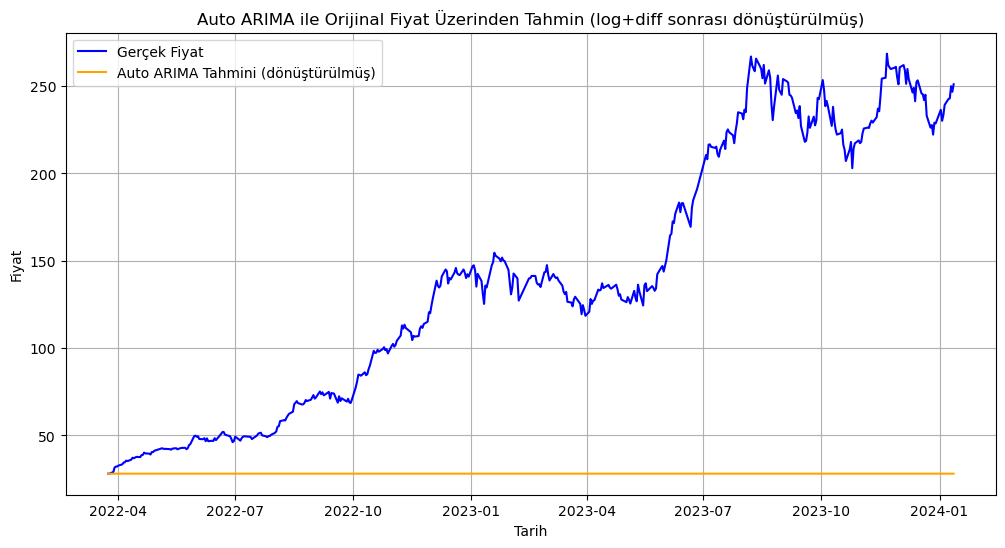

In [25]:
plt.figure(figsize=(12,6))
plt.plot(true_prices.index, true_prices.values, label='Gerçek Fiyat', color='blue')
plt.plot(true_prices.index, predicted_prices_corrected.values, label='Auto ARIMA Tahmini (dönüştürülmüş)', color='orange')
plt.title('Auto ARIMA ile Orijinal Fiyat Üzerinden Tahmin (log+diff sonrası dönüştürülmüş)')
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
print(forecast[:])
print(np.std(forecast))  # varyansına bak


2022-03-24    3.336065
2022-03-25    3.336320
2022-03-26    3.336486
2022-03-27    3.336636
2022-03-28    3.336729
                ...   
2024-01-08    3.337061
2024-01-09    3.337061
2024-01-10    3.337061
2024-01-11    3.337061
2024-01-12    3.337061
Freq: D, Length: 660, dtype: float64
5.8810025280039524e-05
